In [1]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

import parameter_tuning as pt

%load_ext autoreload
%autoreload 2

In [2]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.1,
              'IF': -500,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'Iinit': 1.02,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

In [3]:
stimulus_range_s = [400, 450, 500, 550, 600, 650, 700]
stimulus_range_l = [700, 750, 800, 850, 900, 950, 1000]

In [4]:
stimulus_lst_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_lst_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

# Parameter Space (K 1-21, sigma = 0.01)

In [13]:
K_lst = np.arange(1, 22, 1)
tau = np.arange(60, 200, 10)

print(len(K_lst), len(tau))

21 14


In [14]:
path = '../results/highI/'
short_ktau01, long_ktau01 = pt.load_data(path+'.pickle',
                                      path+'.pickle')
short_ktau02, long_ktau02 = pt.load_data(path+'.pickle',
                                      path+'.pickle')

-12602.750356434164 25239.085596214987


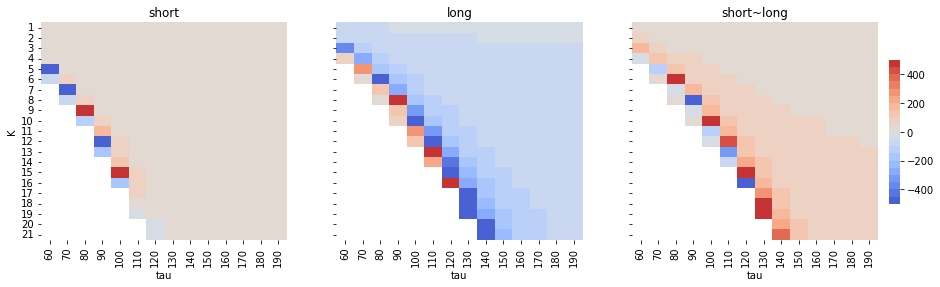

In [16]:
#print('threshold', 0.1)
pt.plot_ind_point(short_ktau01, long_ktau01, K_lst, tau)
#print('threshold', 0.2)
pt.plot_ind_point(short_ktau02, long_ktau02, K_lst, tau)

-0.773563661021133 1.6000267390859277


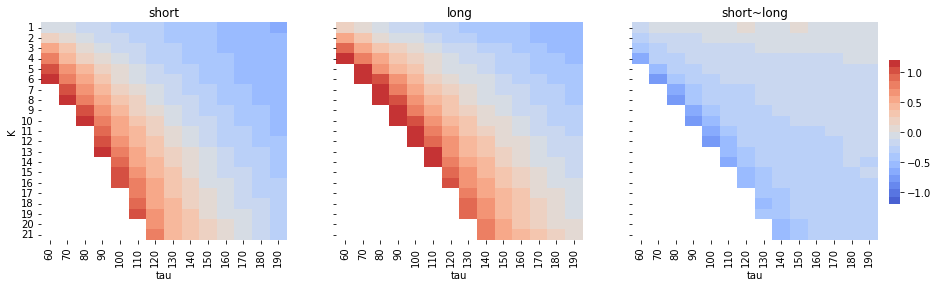

In [15]:
#print('threshold', 0.1)
pt.plot_slope(short_ktau01, long_ktau01, K_lst, tau)

2238.26551257533 62939.41006521884


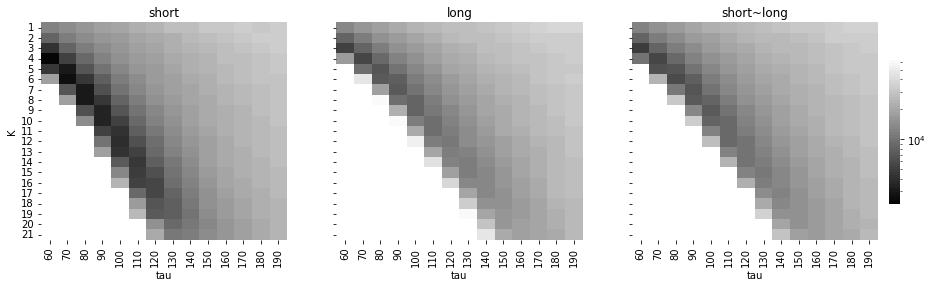

In [17]:
pt.plot_mse(short_ktau01, long_ktau01, K_lst, tau)

In [18]:
print(pt.get_opt_K(short_ktau01, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau01, K_lst, tau, mse=True))

60 4
[(60, 4), (70, 6), (80, 8), (90, 10), (100, 12), (110, 14), (120, 17), (130, 18), (140, 19), (150, 20), (160, 21), (170, 21), (180, 21), (190, 20)]
60 3
[(60, 3), (70, 4), (80, 5), (90, 7), (100, 9), (110, 10), (120, 12), (130, 15), (140, 17), (150, 18), (160, 19), (170, 20), (180, 21), (190, 20)]


/home/katharina/Documents/Studium/Master_NEURO/thesis/code/onetwogo/functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.537354324169588


/home/katharina/Documents/Studium/Master_NEURO/thesis/code/onetwogo/functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.5557179820972293


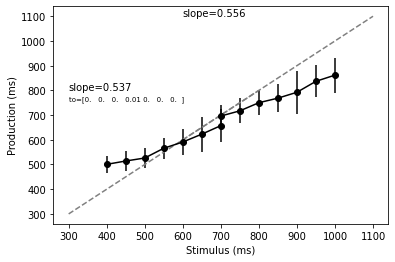

In [22]:
params = Params(ntrials=500, delay=700, tau=120, sigma=0.01, th=0.1, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

K = 17
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 12
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

248812.16700201208 610144.1404958678


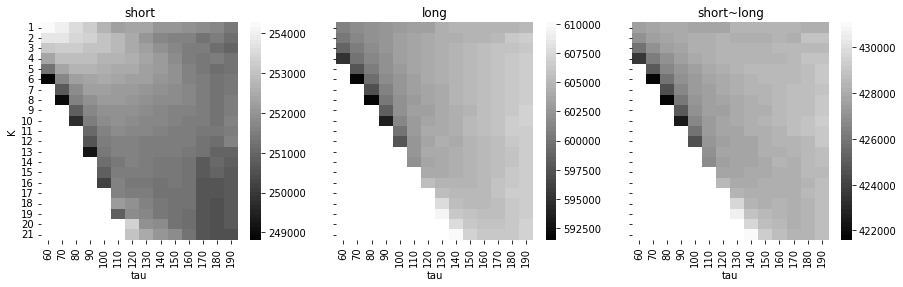

In [23]:
pt.plot_mse_total(short_ktau01, long_ktau01, K_lst, tau)

### reset unsymmetric

In [14]:
path = '../results/highI/'
short_ktau01, long_ktau01 = pt.load_data(path+'H2_SHORT_K1-22_TAU_th01_del700_sig01-20220713-140204-output.pickle',
                                      path+'H2_LONG_K1-22_TAU_th01_del700_sig01-20220713-134437-output.pickle')

-12602.750356434164 25239.085596214987


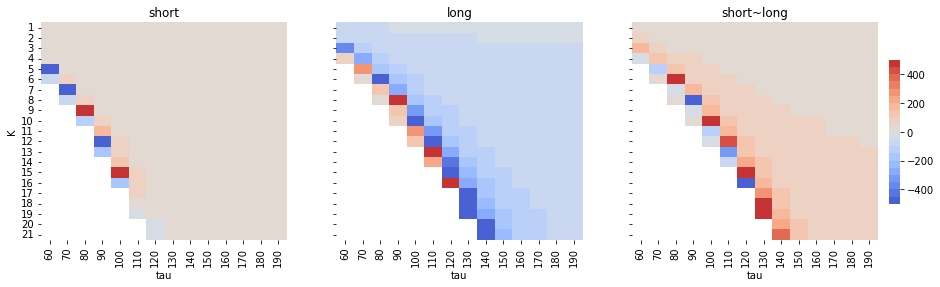

In [16]:
pt.plot_ind_point(short_ktau01, long_ktau01, K_lst, tau)

-0.773563661021133 1.6000267390859277


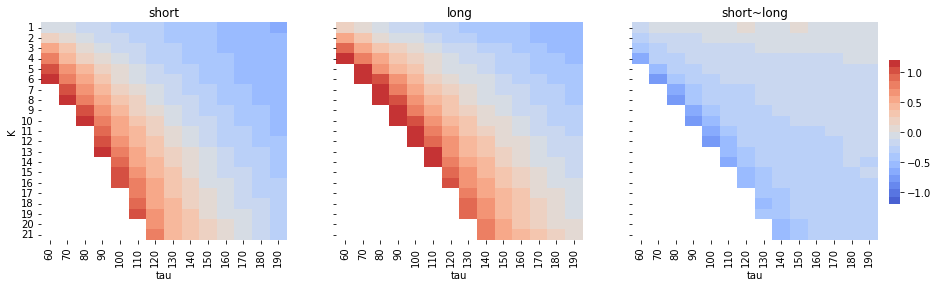

In [15]:
#print('threshold', 0.1)
pt.plot_slope(short_ktau01, long_ktau01, K_lst, tau)

2238.26551257533 62939.41006521884


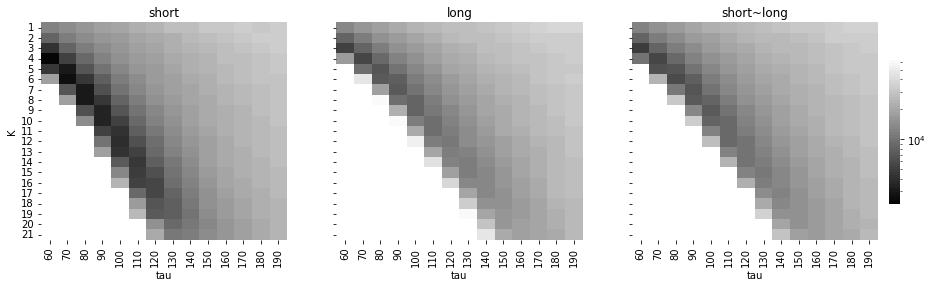

In [17]:
pt.plot_mse(short_ktau01, long_ktau01, K_lst, tau)

In [18]:
print(pt.get_opt_K(short_ktau01, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau01, K_lst, tau, mse=True))

60 4
[(60, 4), (70, 6), (80, 8), (90, 10), (100, 12), (110, 14), (120, 17), (130, 18), (140, 19), (150, 20), (160, 21), (170, 21), (180, 21), (190, 20)]
60 3
[(60, 3), (70, 4), (80, 5), (90, 7), (100, 9), (110, 10), (120, 12), (130, 15), (140, 17), (150, 18), (160, 19), (170, 20), (180, 21), (190, 20)]


/home/katharina/Documents/Studium/Master_NEURO/thesis/code/onetwogo/functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.537354324169588


/home/katharina/Documents/Studium/Master_NEURO/thesis/code/onetwogo/functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.5557179820972293


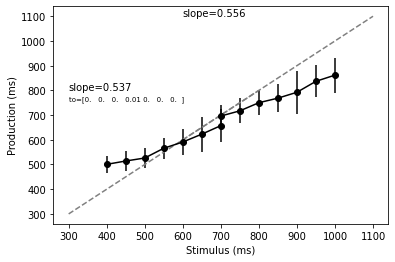

In [22]:
params = Params(ntrials=500, delay=700, tau=120, sigma=0.01, th=0.1, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

K = 17
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

K = 12
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()
print(exp_result.create_behavioral_data().slope)

248812.16700201208 610144.1404958678


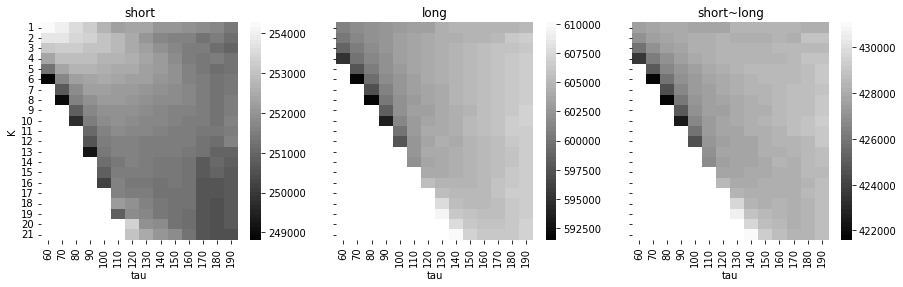

In [23]:
pt.plot_mse_total(short_ktau01, long_ktau01, K_lst, tau)